In [1]:
# Import Cobrapy package
import cobra

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Model is SBML file, read it
model = cobra.io.read_sbml_model("iJR904.xml")

In [3]:
# Set the amount of extracellular glucose to be 0
model.reactions.EX_glc__D_e.bounds = (0, 0)

# Try to optimize, but you can't
model.optimize()

C:\Users\hmvos\anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


<Solution infeasible at 0x279dec93880>

In [4]:
# Now add some glycine uptake
model.reactions.EX_gly_e.bounds = (-20, 0)
model.optimize()

,fluxes,reduced_costs
ALATA_L2,0.000000,1.535809e-17
ALAabc,0.000000,-5.965324e-03
ALAt2r,0.000000,0.000000e+00
ALCD19,0.000000,7.258913e-17
ALDD19xr,0.000000,5.941428e-17
...,...,...
SHSL1,0.027522,-2.580401e-17
SOTA,0.000000,-2.775558e-17
SPMDAT1,0.000000,-5.587520e-01
SPMDAT2,0.000000,-5.587520e-01


In [5]:
# Let's add a reaction that would help the cell use glycine
# Glycine Reductase
gly_rxn = cobra.Reaction('GRD')
gly_rxn.name = 'Glycine Reductase Degradation'
model.add_reactions([gly_rxn])

gly_rxn.add_metabolites({
    'gly_c':-1,
    'trdox_c':1,
    'trdrd_c':-1,
    'h_c':-1,
    'pi_c':-1,
    'nh4_c':-1,
    'h2o_c':1,
    'actp_c':1
})

model.reactions.GRD

Reaction identifier,GRD
Name,Glycine Reductase Degradation
Memory address,0x279ded65dc0
Stoichiometry,gly_c + h_c + nh4_c + pi_c + trdrd_c --> actp_c + h2o_c + trdox_c Glycine + H+ + Ammonium + Phosphate + Reduced thioredoxin --> Acetyl phosphate + H2O H2O + Oxidized thioredoxin
GPR,
Lower bound,0.0
Upper bound,1000.0


In [6]:
model.optimize()

,fluxes,reduced_costs
ALATA_L2,0.000000,1.535809e-17
ALAabc,0.000000,-6.409370e-03
ALAt2r,0.000000,0.000000e+00
ALCD19,0.000000,-9.338099e-17
ALDD19xr,0.000000,5.551115e-17
...,...,...
SOTA,0.000000,0.000000e+00
SPMDAT1,0.000000,-4.774981e-01
SPMDAT2,0.000000,-4.774981e-01
SPMDabc,0.000000,0.000000e+00


In [9]:
uptake_values = np.linspace(2, 40, 100)
growths_without_stickland = []
growths_with_stickland = []

# Measure the growth rates for a range of glycine uptake values with and without the Stickland reaction
for uptake_value in uptake_values:
    model.reactions.EX_gly_e.bounds = (-uptake_value, 0)
    
    # Growth rate measurements without the Stickland reaction
    gly_rxn.bounds = (0, 0)
    model.optimize()
    growths_without_stickland.append(model.reactions.BIOMASS_Ecoli.flux)
    
    gly_rxn.bounds = (-99999, 99999)
    model.optimize()
    growths_with_stickland.append(model.reactions.BIOMASS_Ecoli.flux)

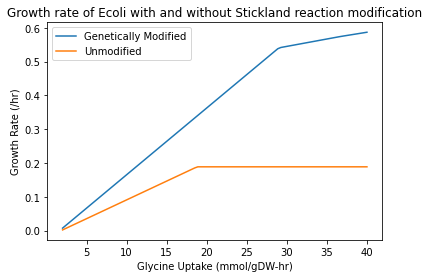

In [10]:
# Plot the results
plt.plot(uptake_values, growths_with_stickland, label="Genetically Modified")
plt.plot(uptake_values, growths_without_stickland, label="Unmodified")

plt.legend()
plt.title("Growth rate of Ecoli with and without Stickland reaction modification")
plt.xlabel("Glycine Uptake (mmol/gDW-hr)")
plt.ylabel("Growth Rate (/hr)");